In [1]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
def sigmoid_function(x):
    return 1/(1+np.exp(-x))

In [3]:
def predict(x,w):
    preds=sigmoid_function(x.dot(w))
    preds[preds<=0.5]=0
    preds[preds>0.5]=1
    return preds

In [21]:
(x,y)=make_blobs(n_samples=1000,n_features=2,centers=2,cluster_std=1.5,random_state=1)

In [22]:
print(y.shape)
print('reshape the Y shape')
y=y.reshape((y.shape[0],1))
print(y.shape)

(1000,)
reshape the Y shape
(1000, 1)


In [23]:
print(x.shape)
x=np.c_[x,np.ones((x.shape[0]))]
print('After the reshape')
print(x.shape)

(1000, 2)
After the reshape
(1000, 3)


In [24]:
(trainX, testX, trainY, testY) = train_test_split(x, y,test_size=0.5, random_state=42)

In [25]:
def next_batch(X, y, batchSize):
# loop over our dataset ‘X‘ in mini-batches, yielding a tuple of
# the current batched data and labels
    for i in np.arange(0, X.shape[0], batchSize):
        yield (X[i:i + batchSize], y[i:i + batchSize])

In [26]:
(trainX, testX, trainY, testY) = train_test_split(x, y,test_size=0.5, random_state=42)

In [27]:
print('[INFO] Training')
w=np.random.randn(x.shape[1],1)
losse=[]

[INFO] Training


The only difference between vanilla gradient descent and SGD is the addition of the next_training_batch
function. Instead of computing our gradient over the entire data set, we instead sample our data,
yielding a batch. We evaluate the gradient on the batch, and update our weight matrix W. From an
implementation perspective, we also try to randomize our training samples before applying SGD
since the algorithm is sensitive to batches.

After looking at the pseudocode for SGD, you’ll immediately notice an introduction of a new
parameter: the batch size. In a “purist” implementation of SGD, your mini-batch size would be 1,
implying that we would randomly sample one data point from the training set, compute the gradient,
and update our parameters. However, we often use mini-batches that are > 1. Typical batch sizes
include 32, 64, 128, and 256.

In [28]:
for epoch in np.arange(0,1000):
    epochLoss=[]
    for (batchX, batchY) in next_batch(x, y,32):
        preds=sigmoid_function(batchX.dot(w))
        error = preds-batchY
        epochLoss.append(np.sum(error ** 2))
        gradient = batchX.T.dot(error)
        w=w+(-0.01)*gradient
    loss = np.average(epochLoss)
    losse.append(loss)
    if epoch == 0 or (epoch + 1) % 5 == 0:
        print("[INFO] epoch={}, loss={:.7f}".format(int(epoch + 1),loss)) 

        

[INFO] epoch=1, loss=1.6081674
[INFO] epoch=5, loss=0.0160092
[INFO] epoch=10, loss=0.0113723
[INFO] epoch=15, loss=0.0093722
[INFO] epoch=20, loss=0.0081468
[INFO] epoch=25, loss=0.0072800
[INFO] epoch=30, loss=0.0066172
[INFO] epoch=35, loss=0.0060853
[INFO] epoch=40, loss=0.0056442
[INFO] epoch=45, loss=0.0052697
[INFO] epoch=50, loss=0.0049461
[INFO] epoch=55, loss=0.0046624
[INFO] epoch=60, loss=0.0044110
[INFO] epoch=65, loss=0.0041861
[INFO] epoch=70, loss=0.0039834
[INFO] epoch=75, loss=0.0037994
[INFO] epoch=80, loss=0.0036316
[INFO] epoch=85, loss=0.0034778
[INFO] epoch=90, loss=0.0033361
[INFO] epoch=95, loss=0.0032051
[INFO] epoch=100, loss=0.0030835
[INFO] epoch=105, loss=0.0029705
[INFO] epoch=110, loss=0.0028649
[INFO] epoch=115, loss=0.0027662
[INFO] epoch=120, loss=0.0026737
[INFO] epoch=125, loss=0.0025866
[INFO] epoch=130, loss=0.0025047
[INFO] epoch=135, loss=0.0024274
[INFO] epoch=140, loss=0.0023544
[INFO] epoch=145, loss=0.0022852
[INFO] epoch=150, loss=0.0022197

In [29]:
print("[INFO] evaluating...")
preds = predict(testX, w)
print(classification_report(testY, preds))

[INFO] evaluating...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



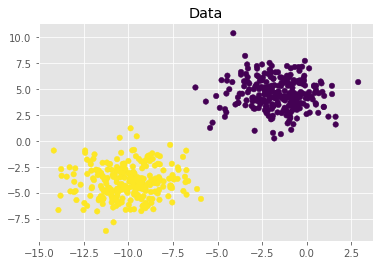

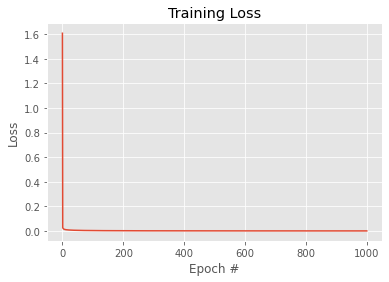

In [30]:
plt.style.use("ggplot")
plt.figure()
plt.title("Data")
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY, s=30)

# construct a figure that plots the loss over time
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,1000), losse)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()